## 1. Paquetes/librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator)

## 2. Variables constantes

In [2]:
COLORES_CORPORATIVOS = ['#0072CE','#E31C79','#00968F','#D9C756','#FE5000','#B1B3B3']
COLORES = ['#2709d6','#f36a2c','#09d267']

HORAS_DIURNAS = ['H07','H08','H09','H10','H11','H12','H13','H14','H15','H16','H17','H18','H19','H20','H21','H22','H23','HoraPunta']

MESES = pd.DataFrame({'nombre':["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]}).set_index(pd.RangeIndex(1,13))

## 3. Carga del dataset

In [3]:
meses_oferta = pd.read_pickle('./datos/output/meses_oferta.pkl')
meses_oferta['fechaCorta'] = meses_oferta[['year','month']].apply(lambda x: pd.to_datetime(f"{x[0]}/{x[1]}/01",format='%Y/%m/%d').strftime('%B.%Y'),axis=1)
meses_oferta

,CLinea,Elinea,Denominacion,year,month,IdFranja,MediaCochesMes,MediaCochesMes_Laborables,fechaCorta
18,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H06,3.840000,4.000000,January.2019
0,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H07,5.580645,6.857143,January.2019
1,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H08,6.580645,7.857143,January.2019
2,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H09,7.387097,8.857143,January.2019
3,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2019,1,H10,8.903226,10.857143,January.2019
...,...,...,...,...,...,...,...,...,...
22601,786,SE,PRINCIPE DE VERGARA - CALLAO,2019,5,H23,4.266667,5.000000,May.2019
638862,786,SE,PRINCIPE DE VERGARA - CALLAO,2019,5,HoraPunta,7.000000,7.000000,May.2019
22602,786,SE,PRINCIPE DE VERGARA - CALLAO,2019,5,M00,3.633333,4.000000,May.2019
22603,786,SE,PRINCIPE DE VERGARA - CALLAO,2019,5,M01,3.000000,3.000000,May.2019


## 4. Evolución núm. autobuses

In [4]:
def graficar(dataset:pd.DataFrame,size:tuple,num_linea:int,franja:str,valores:str='MediaCochesMes',guardar:bool=False):
    '''
    Funcion que genera un gráfico de lineas para los meses de 2019, 2020 y 2021 en la franja hora que se espcifica.
    Parámetros
    ----------
    dataset   : DataFrame. Datos generales sobre las líneas o línea.
    num:linea : int. Número de la línea que se quiere consultar.
    franja    : str. Intervalo horario que se quiere consultar.
    valores   : str. Nombre de la medida que se quiere consultar.
    guardar   : bool. Opción para exportar y guardar la imagen. `False` por defecto   
    '''
    fig, axes = plt.subplots(figsize=size,dpi=100)
    axes.spines.right.set_visible(False)
    axes.spines.top.set_visible(False)


    # Filtro por linea y franja
    listado_franjas = dataset.loc[dataset['CLinea']==num_linea,'IdFranja'].unique()

    dataset = dataset[(dataset['CLinea']==num_linea)&(dataset['IdFranja']==franja)]
    dataset = dataset.dropna(subset=[valores]).drop_duplicates(subset=['year','month']).reset_index(drop=True)
    
    if len(dataset)==0:
        raise Exception(f"Las franjas horarias de la linea {num_linea} son: {listado_franjas}") 
        
    lineaPublico = str(dataset.loc[0,"Elinea"])
    cartel_linea = str(dataset.loc[0,"Denominacion"])

    # Visualizo los datos (media) y fechas
    for idx_color,fecha in enumerate(dataset['year'].unique()):
        axes.plot(dataset.loc[dataset['year'] == fecha,'fechaCorta'],dataset.loc[dataset['year'] == fecha, valores],'-o',label='Franja: '+ franja +'\nAño: '+str(fecha),color=COLORES_CORPORATIVOS[idx_color])


    # Configuraciones visuales
    axes.set_xticks(range(0,len(dataset['fechaCorta'])))
    axes.set_xticklabels(dataset['fechaCorta'], rotation = 45, ha="right")
    
    # axes.set_yticks(range(0,int(dataset[valores].max()+3)))
    axes.set_ylim([0,dataset[valores].max()+3])

    xTicks = axes.get_xticklabels()
    indices_enero = [i for i, fecha in enumerate(dataset['month']) if fecha==1]
            

    for indiceEnero in indices_enero:
        xTicks[indiceEnero].set_weight('bold')
    
    # Título y nombre ejes
    axes.set_xlabel('Fecha')
    axes.set_ylabel('# Autobuses')
    axes.set_title(label=f'Evolución núm. autobuses ({valores})\nLÍNEA {lineaPublico}: {cartel_linea}',pad=20)

    axes.grid(linestyle='--', linewidth=1, axis='both')

    leg = axes.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=0)


    # plt.legend(loc="lower right") # Esto puede deshabilitar quitando la línea
    if guardar:
        plt.savefig(fname=f'images/LÍNEA_{num_linea}_{franja}_{cartel_linea}.jpg',format='jpg', bbox_inches='tight', dpi=200)


    fig.set_facecolor('white')

    plt.show()

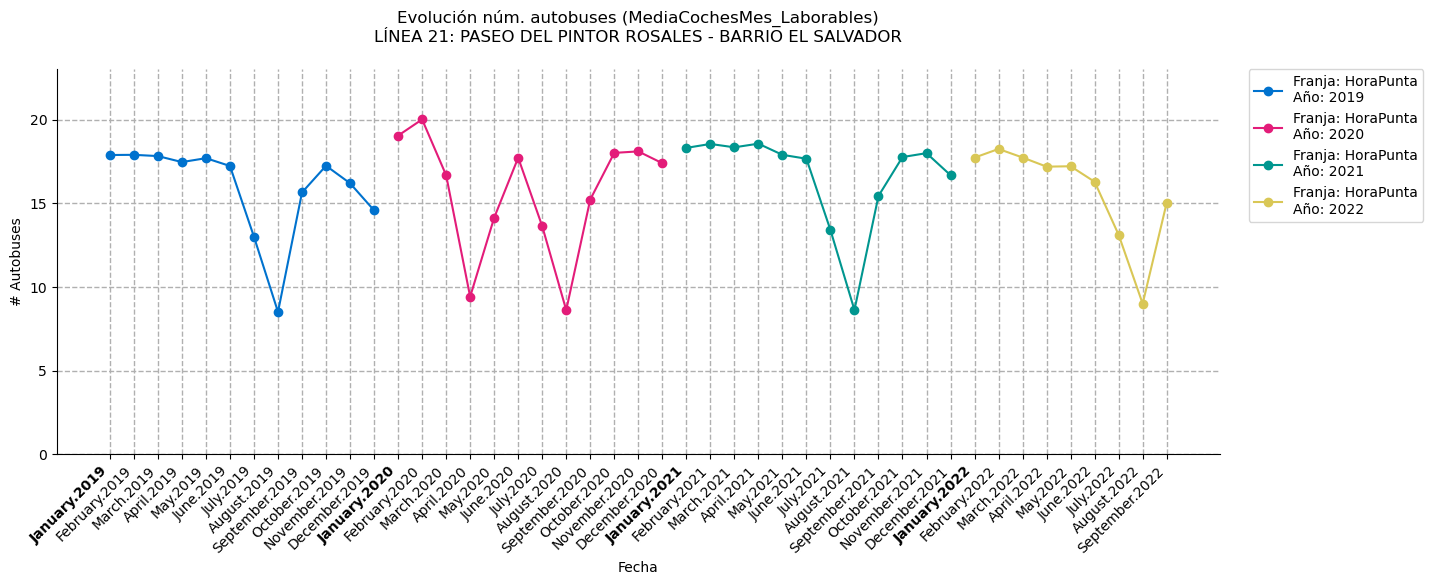

In [5]:
graficar(size=(15,5),dataset=meses_oferta,num_linea=21,franja='HoraPunta',valores='MediaCochesMes_Laborables')

## 5. Cálculo de nuevas columnas

### 5.1 Número medio de coches en días laborables

In [6]:
meses_oferta['MediaCoches_1dia_laborable'] = meses_oferta.groupby(by=['year','month','IdFranja'],as_index=False)['MediaCochesMes_Laborables'].transform('sum')
meses_oferta[meses_oferta['IdFranja'].isin(HORAS_DIURNAS)].sort_values(by=['CLinea','MediaCoches_1dia_laborable',],ascending=[True,False]).head(10)

,CLinea,Elinea,Denominacion,year,month,IdFranja,MediaCochesMes,MediaCochesMes_Laborables,fechaCorta,MediaCoches_1dia_laborable
140185,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,2,H09,8.321429,9.900000,February.2022,1881.968182
140184,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,2,H08,7.500000,8.950000,February.2022,1879.468182
144104,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,3,H09,8.516129,9.956522,March.2022,1879.222222
144103,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,3,H08,7.677419,9.000000,March.2022,1876.048309
90056,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021,4,H09,8.000000,9.850000,April.2021,1860.513158
90055,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021,4,H08,7.233333,8.900000,April.2021,1858.863158
90019,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021,2,H09,8.357143,9.900000,February.2021,1855.450000
90018,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2021,2,H08,7.535714,8.950000,February.2021,1853.300000
151985,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,5,H09,7.774194,9.700000,May.2022,1848.300000
151984,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2022,5,H08,7.193548,8.950000,May.2022,1848.150000


In [7]:
oferta_ymf = meses_oferta.loc[meses_oferta['IdFranja'].isin(HORAS_DIURNAS),['IdFranja','month','year','MediaCoches_1dia_laborable']].set_index(['year','month','IdFranja']).copy()
oferta_ymf = oferta_ymf.drop_duplicates()
oferta_ymf = oferta_ymf.reset_index()
oferta_ymf

,year,month,IdFranja,MediaCoches_1dia_laborable
0,2019,1,H07,1548.523810
1,2019,1,H08,1766.833333
2,2019,1,H09,1772.468254
3,2019,1,H10,1607.444444
4,2019,1,H11,1430.944444
...,...,...,...,...
803,2022,9,H20,1430.954545
804,2022,9,H21,1201.500000
805,2022,9,H22,975.744589
806,2022,9,H23,736.538961


In [8]:
year_horapunta = oferta_ymf.loc[(oferta_ymf['IdFranja']=='HoraPunta'),['IdFranja','month','year','MediaCoches_1dia_laborable']].drop_duplicates().set_index(['year','month'])[['MediaCoches_1dia_laborable']].unstack().T.reset_index(drop=True).copy()

year_horapunta['month'] = pd.date_range(end='2022-01-01', freq='M', periods=12).strftime("%b")
year_horapunta = year_horapunta.set_index('month').fillna(0)
year_horapunta

year,2019,2020,2021,2022
month,,,,
Jan,1700.187831,1745.575661,1733.856424,1730.954167
Feb,1724.416667,1774.175000,1783.166667,1810.001515
Mar,1717.603175,1702.506710,1776.591707,1809.759259
Apr,1707.583333,1094.550000,1787.665789,1762.066667
May,1730.643421,1355.983709,1771.750000,1783.650000
Jun,1710.391667,1617.106061,1694.878788,1700.371212
Jul,1397.282609,1404.385507,1442.810606,1430.417424
Aug,984.507937,960.746032,997.962121,1011.136364
Sep,1595.571429,1517.053030,1572.727273,1624.212121


In [37]:
tmp = oferta_ymf.loc[:,['IdFranja','month','year','MediaCoches_1dia_laborable']].drop_duplicates().set_index(['IdFranja','month','year'])['MediaCoches_1dia_laborable'].unstack().copy()

In [79]:
oferta_ymf.loc[(oferta_ymf['year']==2019) & (oferta_ymf['IdFranja']=='HoraPunta'),['month','MediaCoches_1dia_laborable']].set_index('month')

,MediaCoches_1dia_laborable
month,
1,1700.187831
2,1724.416667
3,1717.603175
4,1707.583333
5,1730.643421
6,1710.391667
7,1397.282609
8,984.507937
9,1595.571429


<AxesSubplot:ylabel='month'>

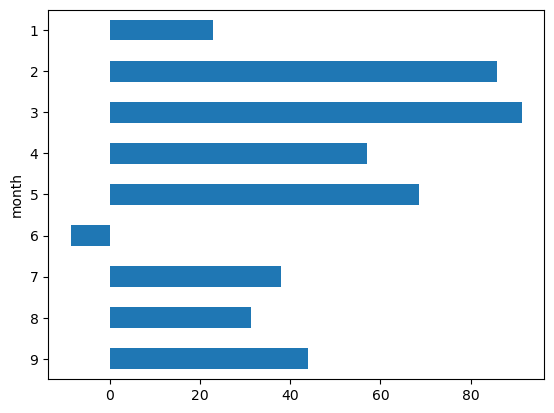

In [83]:
(tmp.loc['H15',2022].sort_index(ascending=False) - tmp.loc['H15',2019].sort_index(ascending=False)).dropna().plot(kind='barh')

In [124]:
(tmp.loc['H08',2022] - tmp.loc['H08',2021]).dropna().sort_index(ascending=False)

month
9    50.954545
8    12.136364
7   -15.645455
6    -0.257576
5     8.100000
4   -34.543860
3    29.699027
2    26.168182
1    -4.689236
dtype: float64

In [128]:
def diferencia(year_1:int,year_2:int,franja:str='HoraPunta'):
    fig, ax = plt.subplots(figsize=(8, 5))


    # Create horizontal bars
    DATA = (tmp.loc[franja,year_2]- tmp.loc[franja,year_1]).dropna()
    COLORES_PLOT = [COLORES_CORPORATIVOS[1] if diff_value < 0  else COLORES_CORPORATIVOS[2] for diff_value in DATA]
    ax.barh(y=DATA.index.values, width=DATA,color=COLORES_PLOT)

    ax.set_yticks(DATA.index.values)
    ax.set_yticklabels(MESES.loc[DATA.index.values,'nombre'])

    # ax.set_yticklabels((meses.sort_values(by=['month'],ascending=False))['month_name'])

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # Add in title and subtitle
    ax.set_title(f'Comparativa {year_2} vs {year_1}',loc='left',size=18,pad=30,weight='bold')

    if(franja=='HoraPunta'):
        franja = 'HoraPunta (H07 - H09)'

    ax.text(x=.125, y=.91, 
            s=f"Diferencia de autobuses en {franja}", 
            transform=fig.transFigure, 
            ha='left', 
            fontsize=14, 
            alpha=.8)
    # Set source text
    ax.text(x=.533, y=0.02, 
            s="""Fuente: Empresa Municipal de Transportes de Madrid""", 
            transform=fig.transFigure,
            ha='left', 
            fontsize=8, 
            alpha=.7)

    ax.plot()
    # fig.savefig(fname='images/autobueses_circulación_diff_2019_2021.png', bbox_inches='tight')

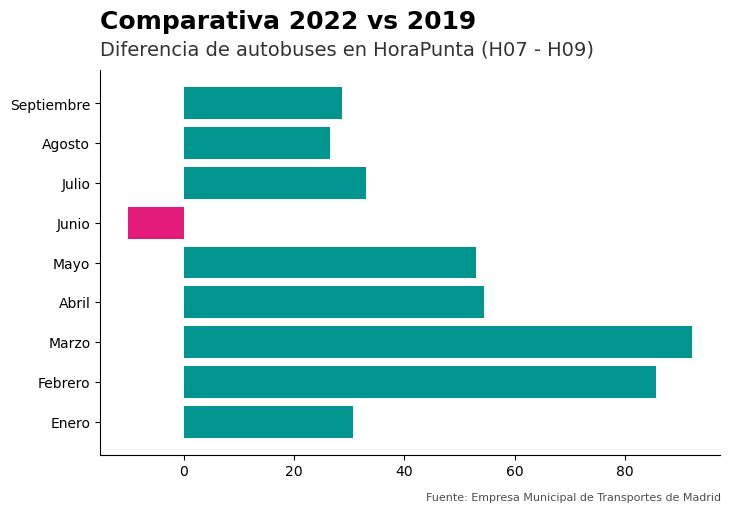

In [126]:
diferencia(year_1=2019,year_2=2022,franja='HoraPunta')

In [11]:
year_horapunta['2022-2021'] = (year_horapunta[2022] - year_horapunta[2021]).astype(int)
year_horapunta['2022-2020'] = (year_horapunta[2022] - year_horapunta[2020]).astype(int)
year_horapunta['2022-2019'] = (year_horapunta[2022] - year_horapunta[2019]).astype(int)

year_horapunta['2021-2020'] = (year_horapunta[2021] - year_horapunta[2020]).astype(int)
year_horapunta['2021-2019'] = (year_horapunta[2021] - year_horapunta[2019]).astype(int)

year_horapunta['2020-2019'] = (year_horapunta[2020] - year_horapunta[2019]).astype(int)


# meses = pd.DataFrame(data={'month':pd.date_range(end='2022-01-01', freq='M', periods=12)})
# meses['month_name'] = meses['month'].dt.strftime("%b")

# year_horapunta['color_22_21'] = [COLORES_CORPORATIVOS[1] if diff_value <0  else COLORES_CORPORATIVOS[2] for diff_value in year_horapunta['2022-2021']]
# year_horapunta['color_22_19'] = [COLORES_CORPORATIVOS[1] if diff_value <0  else COLORES_CORPORATIVOS[2] for diff_value in year_horapunta['2022-2019']]
# year_horapunta['color_21_19'] = [COLORES_CORPORATIVOS[1] if diff_value <0  else COLORES_CORPORATIVOS[2] for diff_value in year_horapunta['2021-2019']]

year_horapunta

year,2019,2020,2021,2022,2022-2021,2022-2020,2022-2019,2021-2020,2021-2019,2020-2019
month,,,,,,,,,,
Jan,1700.187831,1745.575661,1733.856424,1730.954167,-2,-14,30,-11,33,45
Feb,1724.416667,1774.175000,1783.166667,1810.001515,26,35,85,8,58,49
Mar,1717.603175,1702.506710,1776.591707,1809.759259,33,107,92,74,58,-15
Apr,1707.583333,1094.550000,1787.665789,1762.066667,-25,667,54,693,80,-613
May,1730.643421,1355.983709,1771.750000,1783.650000,11,427,53,415,41,-374
Jun,1710.391667,1617.106061,1694.878788,1700.371212,5,83,-10,77,-15,-93
Jul,1397.282609,1404.385507,1442.810606,1430.417424,-12,26,33,38,45,7
Aug,984.507937,960.746032,997.962121,1011.136364,13,50,26,37,13,-23
Sep,1595.571429,1517.053030,1572.727273,1624.212121,51,107,28,55,-22,-78


In [12]:
def evolucion_mes(mes:int=1,franja:str='HoraPunta',color:str=COLORES_CORPORATIVOS[0]):
    # Creamos la figura y el eje
    fig, ax = plt.subplots(figsize=(8, 5),dpi=100)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # Obtenemos los datos
    DATA = oferta_ymf.loc[(oferta_ymf['month']==mes) & (oferta_ymf['IdFranja']==franja),['year','MediaCoches_1dia_laborable']].drop_duplicates().set_index(['year'])
    YEARS = DATA.index.values

    if(franja=='HoraPunta'):
        franja = 'HoraPunta (H07 - H09)'

    # Gráficamos
    bars = ax.bar(YEARS,DATA['MediaCoches_1dia_laborable'],label=YEARS,color=color)
    ax.set_xticks(YEARS)

    # Rango de ejes
    ax.set_ylim(0,int(DATA['MediaCoches_1dia_laborable'].max())+300,100)
    # ax.set_yticks(range(0,int(DATA['MediaCoches_1dia_laborable'].max())+300,100),minor=True)
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    # Add in title and subtitle
    ax.set_title(f'Autobuses en circulación en {MESES.loc[mes,"nombre"]}',loc='left',size=18,pad=50,weight='bold')
    ax.text(x=.125, y=0.96, 
                    s=f"Número de autobuses en {franja}", 
                    transform=fig.transFigure, 
                    ha='left', 
                    fontsize=14, 
                    alpha=.8)
    # Set source text
    ax.text(x=.532, y=0.02, 
                    s="""Fuente: Empresa Municipal de Transportes de Madrid""", 
                    transform=fig.transFigure, 
                    ha='left', 
                    fontsize=8, 
                    alpha=.7)
    ax.bar_label(bars,padding=-13,color='white',fmt='%.0f')
    ax.plot()

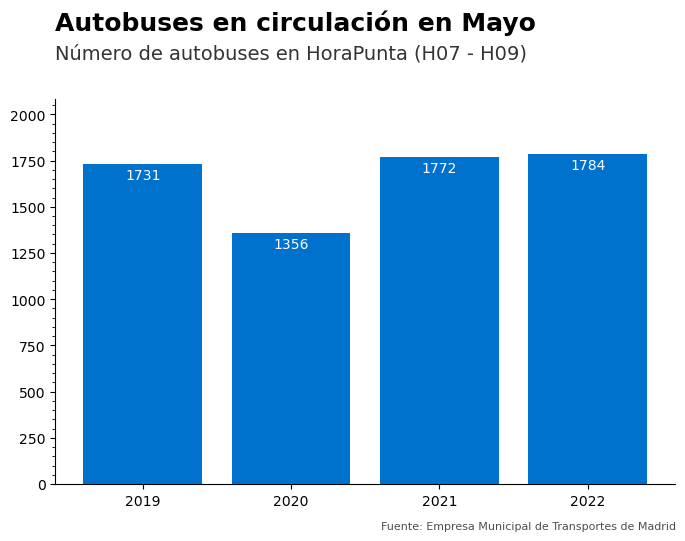

In [18]:
evolucion_mes(mes=5,franja='HoraPunta')

In [19]:
def en_circulacion(franja:str='HoraPunta'):
    fig, ax = plt.subplots(figsize=(8, 5),dpi=100)
   
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # Obtenemos los datos
    DATA = oferta_ymf.loc[(oferta_ymf['IdFranja']==franja),['month','year','MediaCoches_1dia_laborable']]
    YEARS = sorted(DATA['year'].unique())

    for i_color,year in enumerate(YEARS):
        ax.plot(DATA.loc[(oferta_ymf['year']==year),['month','MediaCoches_1dia_laborable']].drop_duplicates().set_index(['month'])[['MediaCoches_1dia_laborable']],'-o',label=str(year),color=list(reversed(COLORES_CORPORATIVOS))[2:][i_color])

    if(franja=='HoraPunta'):
        franja = 'HoraPunta (H07 - H09)'


    ax.set_xticks(range(1,13))
    ax.set_xticklabels(pd.date_range('2021-01-01','2021-12-31',freq='MS').strftime("%b").tolist())
    ax.set_ylim(600)
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    # Add in title and subtitle
    ax.set_title('Autobuses en circulación',loc='left',size=18,pad=40,weight='bold')
    ax.text(x=.125, y=.94, 
            s=f"Número de autobuses en {franja}", 
            transform=fig.transFigure, 
            ha='left', 
            fontsize=14, 
            alpha=.8)
    # Set source text
    ax.text(x=.532, y=0.02, 
            s="""Fuente: Empresa Municipal de Transportes de Madrid""", 
            transform=fig.transFigure, 
            ha='left', 
            fontsize=8, 
            alpha=.7)

    ax.legend()
    # fig.savefig(fname='images/autobueses_circulación.png',bbox_inches='tight')
    ax.plot()

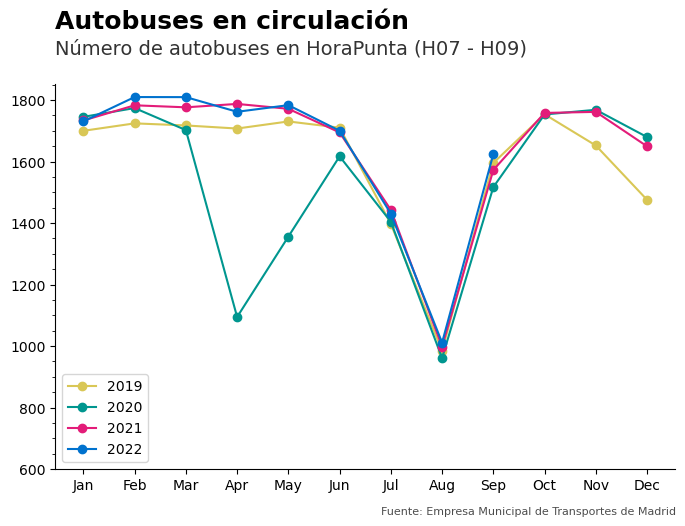

In [20]:
en_circulacion(franja='HoraPunta')